Batch de imagens: torch.Size([32, 3, 256, 256])
Batch de rótulos: torch.Size([32])
Classes no batch: [2 2 1 0 0 1 1 0 0 2 0 0 2 0 0 2 0 1 2 2 0 2 0 2 0 0 1 1 2 1 1 1]


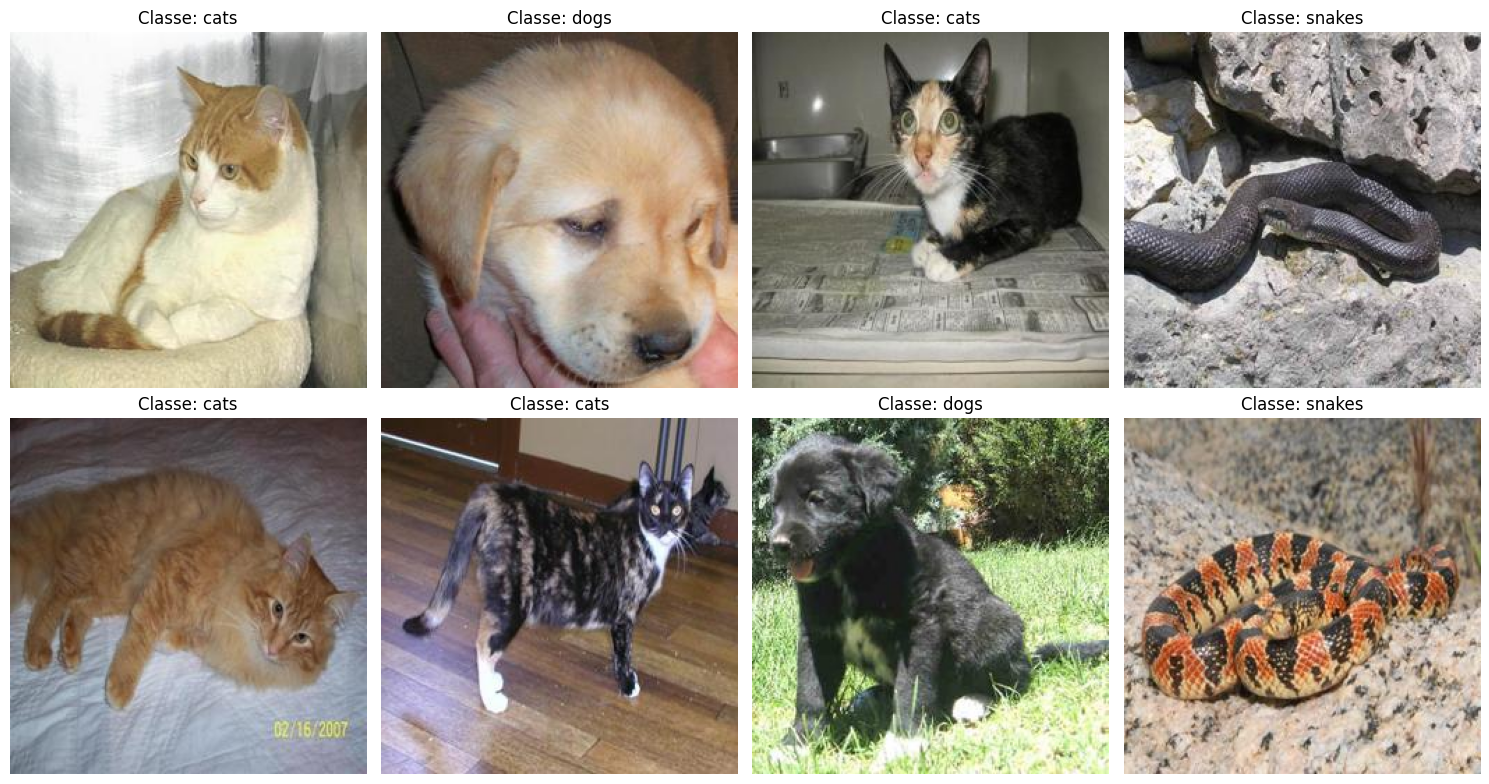

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

class AnimalDataset(Dataset):
    """
    Dataset personalizado para classificação de animais
    """
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = ['cats', 'dogs', 'snakes']
        self.images = []
        self.labels = []
        
        # Carregar todos os caminhos de imagens e seus rótulos
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.images.append(img_path)
                self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        # Carregar imagem
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        
        # Aplicar transformações se existirem
        if self.transform:
            image = self.transform(image)
        
        return image, label

def criar_transformacoes():
    """
    Define as transformações para as imagens
    """
    # Transformações para treino com data augmentation
    transform_train = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    # Transformações para validação sem augmentation
    transform_val = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
    
    return transform_train, transform_val

def criar_dataloaders(root_dir, batch_size=32, num_workers=4):
    """
    Cria os dataloaders para treino e validação
    """
    # Criar transformações
    transform_train, transform_val = criar_transformacoes()
    
    # Criar dataset completo
    dataset = AnimalDataset(root_dir, transform=transform_train)
    
    # Definir tamanhos dos conjuntos
    total_size = len(dataset)
    train_size = int(0.8 * total_size)
    val_size = total_size - train_size
    
    # Dividir em treino e validação
    train_dataset, val_dataset = torch.utils.data.random_split(
        dataset, 
        [train_size, val_size],
        generator=torch.Generator().manual_seed(42)
    )
    
    # Ajustar transformações para o conjunto de validação
    val_dataset.dataset.transform = transform_val
    
    # Criar dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    
    return train_loader, val_loader

def visualizar_grid_imagens(dataset, num_imagens=8):
    # Configurar o grid
    num_rows = 2
    num_cols = num_imagens // num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    
    # Selecionar índices aleatórios
    indices = np.random.choice(len(dataset), num_imagens, replace=False)
    
    for idx, ax in zip(indices, axes.flat):
        # Obter imagem e rótulo
        image, label = dataset[idx]
        
        # Se a imagem for um tensor, converter para numpy
        if isinstance(image, torch.Tensor):
            image = image.numpy().transpose(1, 2, 0)
        
        # Plotar imagem
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'Classe: {dataset.classes[label]}')
    
    plt.tight_layout()
    plt.show()

# Exemplo de uso:
if __name__ == "__main__":
    # Caminho para o dataset
    root_dir = '/kaggle/input/animal-image-classification-dataset/Animals'
    
    # Criar dataloaders
    train_loader, val_loader = criar_dataloaders(root_dir)
    
    # Verificar as dimensões e rótulos
    for images, labels in train_loader:
        print("Batch de imagens:", images.shape)
        print("Batch de rótulos:", labels.shape)
        print("Classes no batch:", labels.numpy())
        break  # Apenas para exemplo
        
    transform = transforms.Compose([
        transforms.Resize((256, 256))
    ])

    dataset = AnimalDataset(root_dir, transform=transform)
    visualizar_grid_imagens(dataset)


Treinando Feature Extractor...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 193MB/s] 



Época 1/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  4.45it/s]


Train Loss: 0.0983 Acc: 0.9629
Val Loss: 0.0384 Acc: 0.9883

Época 2/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  4.34it/s]


Train Loss: 0.0325 Acc: 0.9888
Val Loss: 0.0335 Acc: 0.9917

Época 3/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  4.16it/s]


Train Loss: 0.0244 Acc: 0.9904
Val Loss: 0.0296 Acc: 0.9933

Época 4/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.86it/s]


Train Loss: 0.0205 Acc: 0.9925
Val Loss: 0.0381 Acc: 0.9883

Época 5/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.86it/s]


Train Loss: 0.0168 Acc: 0.9954
Val Loss: 0.0280 Acc: 0.9917

Época 6/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  4.01it/s]


Train Loss: 0.0152 Acc: 0.9954
Val Loss: 0.0372 Acc: 0.9900

Época 7/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.99it/s]


Train Loss: 0.0145 Acc: 0.9958
Val Loss: 0.0362 Acc: 0.9883

Época 8/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.90it/s]


Train Loss: 0.0125 Acc: 0.9967
Val Loss: 0.0348 Acc: 0.9883

Época 9/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.0123 Acc: 0.9971
Val Loss: 0.0367 Acc: 0.9883

Época 10/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.96it/s]


Train Loss: 0.0127 Acc: 0.9950
Val Loss: 0.0477 Acc: 0.9900

Época 11/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]


Train Loss: 0.0103 Acc: 0.9971
Val Loss: 0.0438 Acc: 0.9900

Época 12/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.92it/s]


Train Loss: 0.0082 Acc: 0.9975
Val Loss: 0.0474 Acc: 0.9900

Época 13/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.86it/s]


Train Loss: 0.0084 Acc: 0.9979
Val Loss: 0.0406 Acc: 0.9900

Época 14/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]


Train Loss: 0.0090 Acc: 0.9967
Val Loss: 0.0411 Acc: 0.9900

Época 15/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.92it/s]


Train Loss: 0.0119 Acc: 0.9954
Val Loss: 0.0454 Acc: 0.9917

Melhor acurácia do Feature Extractor: 0.9933


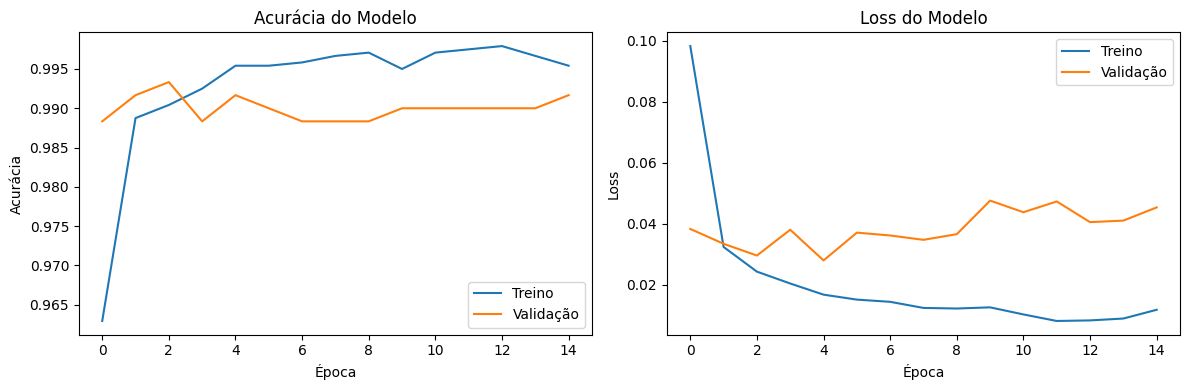


Relatório de Classificação:
              precision    recall  f1-score   support

        cats       1.00      0.98      0.99       204
        dogs       0.98      1.00      0.99       206
      snakes       1.00      1.00      1.00       190

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



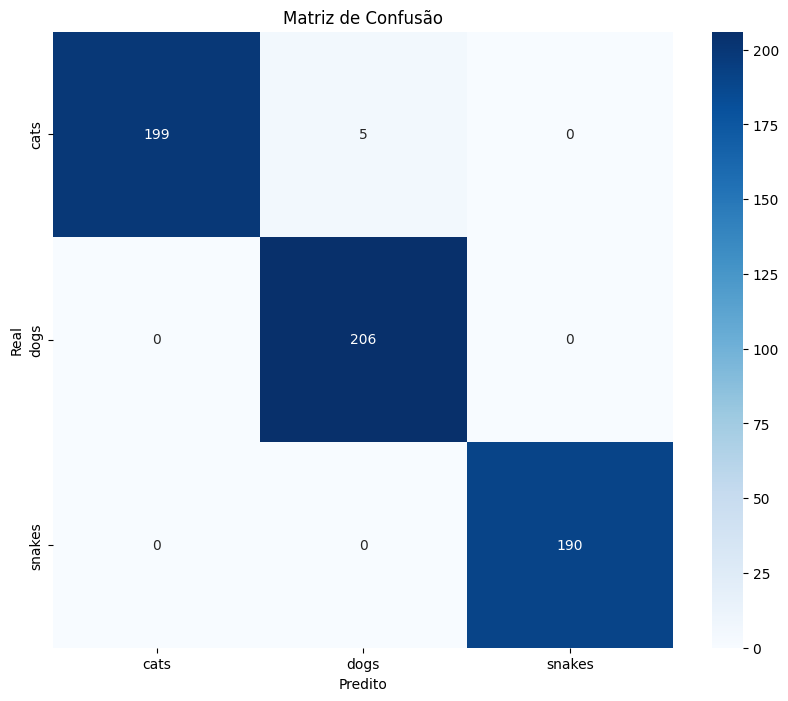


Treinando modelo com Fine-tuning...


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Época 1/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.2150 Acc: 0.9163
Val Loss: 0.0636 Acc: 0.9733

Época 2/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]


Train Loss: 0.0865 Acc: 0.9692
Val Loss: 0.0751 Acc: 0.9767

Época 3/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.91it/s]


Train Loss: 0.0374 Acc: 0.9875
Val Loss: 0.0468 Acc: 0.9850

Época 4/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.0442 Acc: 0.9858
Val Loss: 0.1522 Acc: 0.9617

Época 5/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.92it/s]


Train Loss: 0.0251 Acc: 0.9917
Val Loss: 0.0787 Acc: 0.9800

Época 6/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.90it/s]


Train Loss: 0.0143 Acc: 0.9963
Val Loss: 0.0604 Acc: 0.9883

Época 7/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.92it/s]


Train Loss: 0.0582 Acc: 0.9871
Val Loss: 0.1045 Acc: 0.9583

Época 8/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.0787 Acc: 0.9775
Val Loss: 0.0810 Acc: 0.9800

Época 9/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.95it/s]


Train Loss: 0.0423 Acc: 0.9875
Val Loss: 0.1117 Acc: 0.9817

Época 10/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.0133 Acc: 0.9967
Val Loss: 0.0730 Acc: 0.9817

Época 11/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.0033 Acc: 0.9988
Val Loss: 0.0886 Acc: 0.9917

Época 12/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]


Train Loss: 0.0235 Acc: 0.9917
Val Loss: 0.1231 Acc: 0.9850

Época 13/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]


Train Loss: 0.0448 Acc: 0.9888
Val Loss: 0.0682 Acc: 0.9800

Época 14/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]


Train Loss: 0.0088 Acc: 0.9975
Val Loss: 0.0747 Acc: 0.9817

Época 15/15


Validation: 100%|██████████| 19/19 [00:04<00:00,  3.94it/s]


Train Loss: 0.0054 Acc: 0.9988
Val Loss: 0.0736 Acc: 0.9883

Melhor acurácia do Fine-tuning: 0.9917


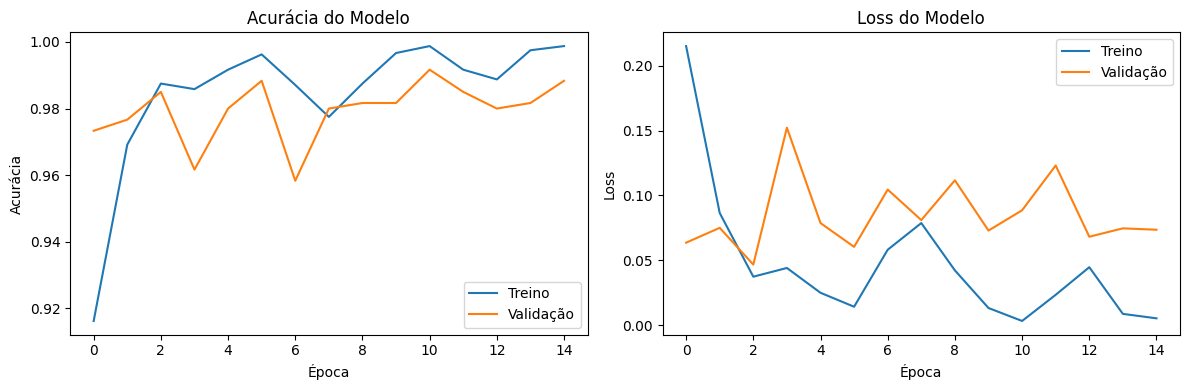


Relatório de Classificação:
              precision    recall  f1-score   support

        cats       0.99      0.98      0.98       204
        dogs       0.98      0.99      0.98       206
      snakes       1.00      1.00      1.00       190

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



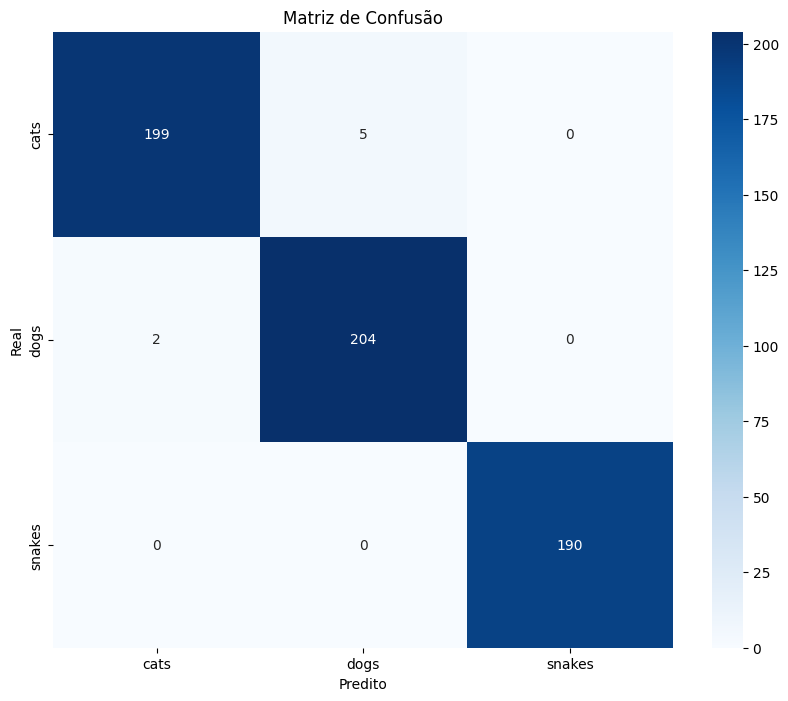

In [2]:

BATCH_SIZE = 32
NUM_EPOCHS = 15
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
IMG_SIZE = 256  
NUM_CLASSES = 3  
CLASSES = ['cats', 'dogs', 'snakes']


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm import tqdm
import os


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Carregar VGG16 pré-treinado
        vgg16 = models.vgg16(pretrained=True)
        
        # Congelar todos os parâmetros
        for param in vgg16.parameters():
            param.requires_grad = False
            
        num_features = vgg16.classifier[6].in_features
        features = list(vgg16.classifier.children())[:-1]
        features.extend([
            nn.Linear(num_features, NUM_CLASSES),
            #nn.ReLU(inplace=True),
            #nn.Dropout(0.5),
            #nn.Linear(512, NUM_CLASSES)
        ])
        vgg16.classifier = nn.Sequential(*features)
        
        self.model = vgg16
        
    def forward(self, x):
        return self.model(x)

class FineTuningModel(nn.Module):
    def __init__(self):
        super(FineTuningModel, self).__init__()
        # Carregar VGG16 pré-treinado
        vgg16 = models.vgg16(pretrained=True)
        
            
        num_features = vgg16.classifier[6].in_features
        features = list(vgg16.classifier.children())[:-1]
        features.extend([
            nn.Linear(num_features, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, NUM_CLASSES)
        ])
        vgg16.classifier = nn.Sequential(*features)
        
        self.model = vgg16
        
    def forward(self, x):
        return self.model(x)

def treinar_epoca(model, dataloader, criterion, optimizer, device, is_training=True):
    running_loss = 0.0
    running_corrects = 0
    
    if is_training:
        model.train()
    else:
        model.eval()
    
    for inputs, labels in tqdm(dataloader, desc='Training' if is_training else 'Validation'):
        inputs, labels = inputs.to(device), labels.to(device)
        
        if is_training:
            optimizer.zero_grad()
            
        with torch.set_grad_enabled(is_training):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            if is_training:
                loss.backward()
                optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc = running_corrects.double() / len(dataloader.dataset)
    
    return epoch_loss, epoch_acc

def treinar_modelo(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    best_acc = 0.0
    best_model_wts = None
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f'\nÉpoca {epoch+1}/{num_epochs}')
        
        # Treino
        train_loss, train_acc = treinar_epoca(
            model, train_loader, criterion, optimizer, device, is_training=True
        )
        
        # Validação
        val_loss, val_acc = treinar_epoca(
            model, val_loader, criterion, optimizer, device, is_training=False
        )
        
        # Salvar melhor modelo
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict().copy()
        
        # Registrar métricas
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc.item())
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc.item())
        
        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
    
    # Restaurar melhor modelo
    model.load_state_dict(best_model_wts)
    return history, best_acc

def plotar_metricas(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfico de acurácia
    ax1.plot(history['train_acc'])
    ax1.plot(history['val_acc'])
    ax1.set_title('Acurácia do Modelo')
    ax1.set_ylabel('Acurácia')
    ax1.set_xlabel('Época')
    ax1.legend(['Treino', 'Validação'])
    
    # Gráfico de loss
    ax2.plot(history['train_loss'])
    ax2.plot(history['val_loss'])
    ax2.set_title('Loss do Modelo')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Época')
    ax2.legend(['Treino', 'Validação'])
    
    plt.tight_layout()
    plt.show()

def avaliar_modelo(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    # Gerar relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(all_labels, all_preds, target_names=CLASSES))
    
    # Gerar e plotar matriz de confusão
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title('Matriz de Confusão')
    plt.ylabel('Real')
    plt.xlabel('Predito')
    plt.show()

def main():
    # Caminho para o dataset de animais
    diretorio_dataset = '/kaggle/input/animal-image-classification-dataset/Animals'
    
    # Carregar dataset
    train_loader, val_loader = criar_dataloaders(diretorio_dataset)
    
    # Configurações de treinamento
    criterion = nn.CrossEntropyLoss()
    
    # 1. Feature Extractor
    print("\nTreinando Feature Extractor...")
    feature_extractor = FeatureExtractor().to(DEVICE)
    optimizer_fe = optim.Adam(feature_extractor.parameters(), lr=0.001)
    
    history_fe, best_acc_fe = treinar_modelo(
        feature_extractor,
        train_loader,
        val_loader,
        criterion,
        optimizer_fe,
        NUM_EPOCHS,
        DEVICE
    )
    
    print(f"\nMelhor acurácia do Feature Extractor: {best_acc_fe:.4f}")
    plotar_metricas(history_fe)
    avaliar_modelo(feature_extractor, val_loader, DEVICE)
    
    # 2. Fine-tuning
    print("\nTreinando modelo com Fine-tuning...")
    fine_tuning_model = FineTuningModel().to(DEVICE)
    optimizer_ft = optim.Adam(fine_tuning_model.parameters(), lr=0.0001)
    
    history_ft, best_acc_ft = treinar_modelo(
        fine_tuning_model,
        train_loader,
        val_loader,
        criterion,
        optimizer_ft,
        NUM_EPOCHS,
        DEVICE
    )
    
    print(f"\nMelhor acurácia do Fine-tuning: {best_acc_ft:.4f}")
    plotar_metricas(history_ft)
    avaliar_modelo(fine_tuning_model, val_loader, DEVICE)

if __name__ == "__main__":
    main()

In [3]:
vgg16 = models.vgg16(pretrained=True)
vgg16

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
from torchvision.models import alexnet, resnet18

In [5]:
from torchvision.models.resnet import ResNet18_Weights
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = resnet18(weights=ResNet18_Weights.DEFAULT).to(device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 188MB/s]


In [6]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  